In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns 
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

# Задания для самостоятельного решения

<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

**Алгоритм действий**:
1. Определить тип выборки: связанная или не связанная? - я предполагаю, что НЕ СВЯЗАННЫЕ, так как разные группы людей и препарат
2. Определить какой тест будем использовать? - предполагаю использовать **критерий Манна-Уитни**
3. Далее, формируем Н0 гипотезу и Н1
4. Н0 - у групп А и В нет различий в эффекте
5. Н1 - у групп А и В есть различия в эффекте

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p*100))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')


Statistics=4343.000, p=5.435
Одинаковые распределения (не отвергаем H0)


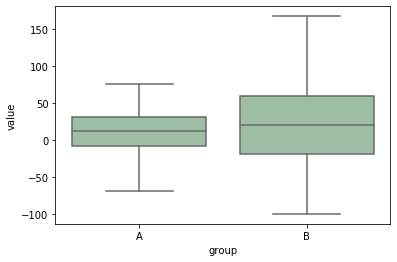

In [3]:
#Визуализируем результат

data_group = pd.DataFrame()
data_group['value'] = np.concatenate([A,B])
data_group['group'] = ['A']*len(A)+['B']*len(B)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
#ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()

**Задание 1 - Вывод: исходя из график также заключаем, что у групп А и В нет различий в эффекте. НО ПОДСКАЖИТЕ, ВЕРНО ЛИ ЭТО ИМЕННО ИСХОДЯ ИЗ ГРАФИКА?**

<hr style="border:2px solid gray"> </hr>

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

**Алгоритм действий**:
1. Определить тип выборки: связанная или не связанная? - я предполагаю, что СВЯЗАННАЯ, так как группа людей одна и та же 
2. Определить какой тест будем использовать? - предполагаю использовать **t-test Стьюдента, но не уверен в корерктности, прошу поправить в случае чего**
3. Далее, формируем Н0 гипотезу и Н1
4. Н0 - у группы А и В нет различий в эффекте
5. Н1 - у групп А и В есть различия в эффекте

In [6]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

stat , p = stats.ttest_ind(A, B) # применяем тест Стьюдента. 
print('Statistics=%.3f, p=%.3f' % (stat, p*100))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=-1.734, p=8.451
Одинаковые распределения (не отвергаем H0)


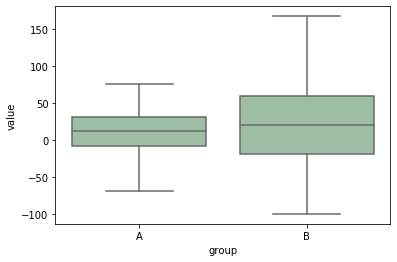

In [7]:
#Визуализируем результат

data_group = pd.DataFrame()
data_group['value'] = np.concatenate([A,B])
data_group['group'] = ['A']*len(A)+['B']*len(B)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
#ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()

**Задание 2 - Вывод: исходя из график также заключаем, что у групп А и В нет различий в эффекте. НО ПОДСКАЖИТЕ, ВЕРНО ЛИ ЭТО ИМЕННО ИСХОДЯ ИЗ ГРАФИКА?**

<hr style="border:2px solid gray"> </hr>

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [12]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

F, p = f_oneway(water, nutri, mineral)

alpha = 0.05  # Уровень значимости
print(F, p*100)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 0.0029240047906326865
Разное распределение (отклоняем H0)


**Если я правильно понял условие, то необходимо сделать вывод по Удобрению и Минералки, то есть имеем две не связанные группы. 
Поправьте меня если я ошибаюсь. (проверяю в ячейке ниже)** 
1. H0 - эффект от удобрения по сравнению с минералкой нет
2. H1 - эффект от удобрения по сравнению с минералкой есть

In [24]:
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

F, p = f_oneway(nutri, mineral)

alpha = 0.05  # Уровень значимости
print(F, p*100)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

18.128724672228838 0.01213673340124552
Разное распределение (отклоняем H0)


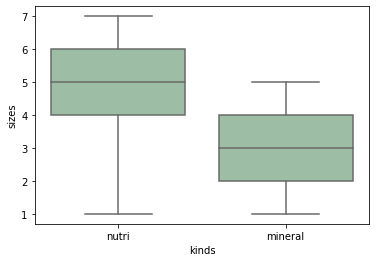

In [19]:
#Boxplot

sizes = water, nutri, mineral
#kinds = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
kinds = ['nutri']*len(nutri)+['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['sizes'] = np.concatenate([nutri, mineral])
df_mid['kinds'] = kinds

ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')

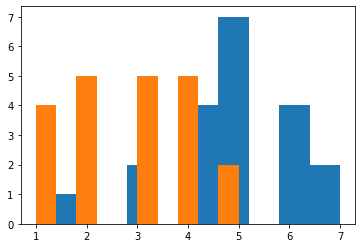

In [22]:
#Histogram

plt.hist(nutri)
plt.hist(mineral);

<hr style="border:2px solid gray"> </hr>

# Cookie Cats (Обязательно)

In [2]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
userid            90189 non-null int64
version           90189 non-null object
sum_gamerounds    90189 non-null int64
retention_1       90189 non-null bool
retention_7       90189 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [3]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


**Формируем гипотезу: необходимо понять на на каком уровня нужно поставить ворота? Также делаю вывод, что выборки НЕ СВЯЗАННЫЕ.**
0. Используем критериий Манни-Уитни
1. Рассматриваем только значение retention 7
2. H0 - Лучшее место для установки ворот gate_30
3. H1 - Лучшее место для установки ворот gate_40

In [68]:
#Формируем dataframe исключая столбец retention 1 и также предлагаю оставить только значения где sum_gamerounds < 100
#ХОЧУ ПОЯСНИТЬ ЭТОТ МОМЕНТ - СУДЯ ПО ГРАФИКАМ BOXPLOT В ДАННЫХ БОЛЬШОЕ КОЛИЧЕСТВО АНОМАЛИЙ, КОТОРЫЕ ВЛИЯЮТ НА КОРРЕКТНОСТЬ 
#РАСПРЕДЕЛЕНИЯ, ТЕМ САМЫМЫ РЕШЕНО РАССМАТРИВАТЬ ИМЕННО ЗНАЧЕНИЕ МЕНЬШЕ 100. - ПОДСКАЖИТЕ ПРАВИЛЬНО ЛИ Я РАССУЖДАЮ???

cats = data[['version','sum_gamerounds','retention_7']]
cats = cats[cats['sum_gamerounds'] < 100]

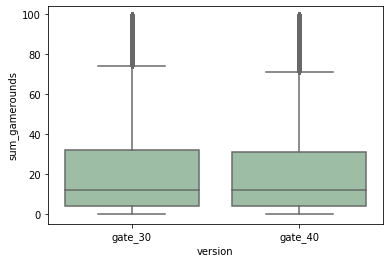

In [71]:
ax = sns.boxplot(x='version', y='sum_gamerounds', data=cats, color='#99c2a2')

In [130]:
#Перевожу значения столбца sum_gameroudns в массив и НАДЕСЮЬ ЭТО ВЕРНОЕ ДЕЙСТВИЕ?
g_30 = cats.loc[(cats.version == 'gate_30')]['sum_gamerounds'].to_numpy()
g_40 = cats.loc[(cats.version == 'gate_40')]['sum_gamerounds'].to_numpy()

In [131]:
stat, p = mannwhitneyu(g_30, g_40) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')


Statistics=745238438.000, p=0.002
Разные распределения (отвергаем H0)


**ВЫВОД: По итогу проверки гипотезы мы получаем, что в наших данных разное распределение и мы отвергаем Н0 и заключаем, что ЛУЧШЕЕ МЕСТО ДЛЯ УСТАНОВКИ ВОРОТ GATE 40.**

ПРОШУ ДАТЬ ОБРАТНУЮ СВЯЗЬ В ЦЕЛОМ ПО АЛГОРИТМУ ДЕЙСТВИЙ, ЕСТЬ ЛИ НАПРИМЕР ЕЩЕ КАКОЕ НИБУДЬ РЕШЕНИЕ ПО ДАННОЙ ЗАДАЧЕ? ЕСЛИ НЕ СЛОЖНО ПРОШУ НАПИСАТЬ. СПАСИБО.

<hr style="border:2px solid gray"> </hr>

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [2]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.info()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
pid          800 non-null int64
Name         799 non-null object
Class 1      800 non-null object
Class 2      414 non-null object
HP           800 non-null int64
Attack       800 non-null int64
Defense      800 non-null int64
Sp. Atk      800 non-null int64
Sp. Def      800 non-null int64
Speed        800 non-null int64
Legendary    800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [111]:
pokemon[pokemon['Name'].isnull()]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,False


<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


**Алгоритм действий:**
1. Подготовили два dataframe с покемонами класса Grass and Rock согласно условию
2. Определяем тип выборки - заключаю, что выборка **СВЯЗАННАЯ** - **ПОЯСНИТЕ ПЛИЗ ПОЧЕМУ, ТАК КАК ПОЛНОСТЬЮ НЕ ПОНИМАЮ...**
3. Определяем какой критерий будем использовать - заключаю, что можем использовать **критерий t-test Стьюдента**
4. Формируем гипотезу:
5. H0 - Покемоны в классе Grass имеют более сильную обычную атаку, чем Rock 
6. H1 - Покемоны в классе Rock имеют более сильную обычную атаку, чем Grass 

In [3]:
#Вытаскиваем покемонов только с одним Классом, который равен Grass

gr = pokemon[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'].isna())]
#gr['Attack'].describe()
#gr.info()

In [4]:
#Вытаскиваем покемонов только с одним Классом, который равен Rock

ro = pokemon[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'].isna())]
#ro['Attack'].describe()
#ro.info()

In [5]:
both = pd.concat([gr,ro])
both = both.reset_index(drop=True)

In [9]:
both.tail()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
37,455,Rampardos,Rock,NaN,97,165,60,65,50,58,False
38,487,Bonsly,Rock,NaN,50,80,95,10,45,10,False
39,584,Roggenrola,Rock,NaN,55,75,85,25,25,15,False
40,585,Boldore,Rock,NaN,70,105,105,50,40,20,False
41,586,Gigalith,Rock,NaN,85,135,130,60,80,25,False


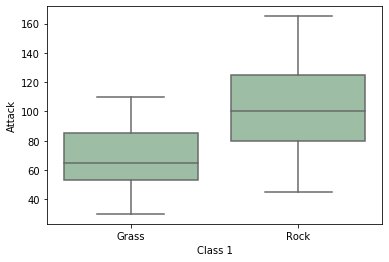

In [129]:
#Построив boxplot можем визуально заключить что у класса Rock атака сильнее, но проверим также и статистичеки

ax = sns.boxplot(x='Class 1', y='Attack', data=both, color='#99c2a2')

In [10]:
A = gr['Attack'].to_numpy()
B = ro['Attack'].to_numpy()

stat, p = stats.ttest_ind(A,B) # t-test Стьюдента
print('Statistics=%.3f, p=%.3f' % (stat, p*100))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')


Statistics=-3.602, p=0.086
Разные распределения (отвергаем H0)


**ВЫВОД: Исходя из статистического анализа, мы отвергаем гипотезу Н0, тем самым заключаем что, Покемоны в классе Rock имеют более сильную обычную атаку, чем Grass**

<hr style="border:1px solid gray"> </hr>

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

**Алгоритм действий:**
1. Подготовили два dataframe с покемонами класса Water and Normal согласно условию
2. Определяем тип выборки - заключаю, что выборка **СВЯЗАННАЯ** - **ПОЯСНИТЕ ПЛИЗ ПОЧЕМУ, ТАК КАК ПОЛНОСТЬЮ НЕ ПОНИМАЮ...**
3. Определяем какой критерий будем использовать - заключаю, что можем использовать **критерий t-test Стьюдента**
4. Формируем гипотезу:
5. H0 - Покемоны в классе Water более быстрые, чем в Normal 
6. H1 - Покемоны в классе Water менее быстрые, чем в Normal  

In [15]:
#Вытаскиваем покемонов только с одним Классом, который равен Water

wa = pokemon[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'].isna())]
wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 9 to 763
Data columns (total 11 columns):
pid          59 non-null int64
Name         59 non-null object
Class 1      59 non-null object
Class 2      0 non-null object
HP           59 non-null int64
Attack       59 non-null int64
Defense      59 non-null int64
Sp. Atk      59 non-null int64
Sp. Def      59 non-null int64
Speed        59 non-null int64
Legendary    59 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 5.1+ KB


In [14]:
#Вытаскиваем покемонов только с одним Классом, который равен Normal

no = pokemon[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'].isna())]
no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 24 to 744
Data columns (total 11 columns):
pid          61 non-null int64
Name         61 non-null object
Class 1      61 non-null object
Class 2      0 non-null object
HP           61 non-null int64
Attack       61 non-null int64
Defense      61 non-null int64
Sp. Atk      61 non-null int64
Sp. Def      61 non-null int64
Speed        61 non-null int64
Legendary    61 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 5.3+ KB


In [16]:
both1 = pd.concat([wa,no])
both1 = both1.reset_index(drop=True)

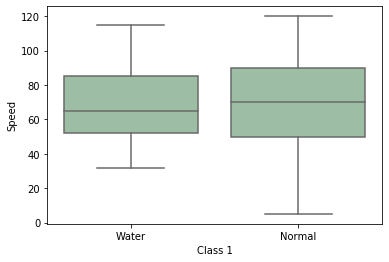

In [17]:
#Построив boxplot можем визуально заключить что класс Water быстрее чем Normal, но проверим также и статистичеки

ax = sns.boxplot(x='Class 1', y='Speed', data=both1, color='#99c2a2')

In [19]:
A = wa['Speed'].to_numpy()
B = no['Speed'].to_numpy()

stat, p = stats.ttest_ind(A,B) # t-test Стьюдента
print('Statistics=%.3f, p=%.3f' % (stat, p*100))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')


Statistics=-0.353, p=72.479
Одинаковые распределения (не отвергаем H0)


**ВЫВОД: Исходя из статистического анализа, мы не можем отвергнуть гипотезу Н0, тем самым заключаем что, Покемоны в классе Water чуть чуть быстрее чем в классе Normal**

<hr style="border:1px solid gray"> </hr>

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

**Алгоритм действий:**
1. Подготовили два dataframe с покемонами до и после
2. Определяем тип выборки - заключаю, что выборка **СВЯЗАННАЯ**
3. Определяем какой критерий будем использовать - заключаю, что можем использовать **paired t-test**, так как объект наблюдений один и тот же, в данном случае тут кейс "до и после". 
4. Формируем гипотезу:
5. H0 - Покемоны до вакцины быстрее чем после вакцины
6. H1 - Покемоны после вакцины быстрее чем до вакцины

In [39]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Speed Forme', 'Mega Lopunny']

# Покемоны, которые ДО сыворотки увеличения скорости
before_pokemon = ['Beedrill','Alakazam', 'Deoxys Normal Forme', 'Lopunny']

In [42]:
vacc_after = pokemon[pokemon['Name'].isin(treathed_pokemon)]
vacc_after

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [41]:
vacc_before = pokemon[pokemon['Name'].isin(before_pokemon)]
vacc_before

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
18,19,Beedrill,Bug,Poison,65,90,40,45,80,75,False
70,71,Alakazam,Psychic,NaN,55,50,45,135,95,120,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
475,476,Lopunny,Normal,NaN,65,76,84,54,96,105,False


In [47]:
A = vacc_before['Speed'].to_numpy()
B = vacc_after['Speed'].to_numpy()

stat, p = stats.ttest_rel(A,B, alternative='less') # paired t-test #ПРАВИЛЬНО ЛИ ЧТО ТУТ LESS ONE SIDED TEST???
print('Statistics=%.3f, p=%.3f' % (stat, p*100))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')


Statistics=-4.000, p=1.400
Разные распределения (отвергаем H0)


**ВЫВОД: Исходя из статистического анализа, мы не можем отвергнуть гипотезу Н0, тем самым заключаем что, Покемоны после вакцины быстрее чем до вакцины**

<hr style="border:1px solid gray"> </hr>

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

**Алгоритм действий:**
1. Подготовили два dataframe с покемонами легендарными и не легендарными и также добавим столбец, который будет содержать сумму HP,Attack,Defense и еще один столбец, который будет содержать произведение.  
2. Определяем тип выборки - заключаю, что выборка **СВЯЗАННАЯ**
3. Определяем какой критерий будем использовать - заключаю, что можем использовать **t-test Стьюдента**, так как объект наблюдений один и тот же, в данном случае тут кейс "до и после". 
4. Формируем гипотезу:
5. H0 - Покемоны легендарные лучше относительно простых покемонов
6. H1 - Покемоны легендарные не лучше относительно простых покемонов

In [52]:
pokemon[pokemon['Legendary'] == True]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [53]:
def sum_params(row):
    return row['HP'] + row['Attack'] + row['Defense']

def multi_params(row):
    return row['HP'] * row['Attack'] * row['Defense']

In [54]:
pokemon['Sum'] = pokemon.apply(sum_params, axis=1)

In [56]:
pokemon['Multi'] = pokemon.apply(multi_params, axis=1)

In [57]:
pokemon

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,Multi
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


In [58]:
legends = pokemon[pokemon['Legendary'] == True]
not_legends = pokemon[pokemon['Legendary'] == False]

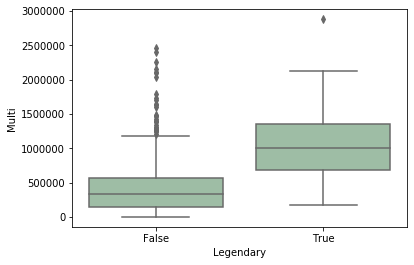

In [60]:
#Построим boxplot

ax = sns.boxplot(x='Legendary', y='Multi', data=pokemon, color='#99c2a2')

In [65]:
A = legends['Sum'].to_numpy()
B = not_legends['Sum'].to_numpy()

stat, p = stats.ttest_ind(A,B) # t-test Стьюдента
print('Statistics=%.3f, p=%.3f' % (stat, p*100))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')


Statistics=11.592, p=0.000
Разные распределения (отвергаем H0)


In [66]:
A = legends['Multi'].to_numpy()
B = not_legends['Multi'].to_numpy()

stat, p = stats.ttest_ind(A,B) # t-test Стьюдента
print('Statistics=%.3f, p=%.3f' % (stat, p*100))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')


Statistics=13.263, p=0.000
Разные распределения (отвергаем H0)


**ВЫВОД: Исходя из статистического анализа, мы отвергаем гипотезу Н0, тем самым заключаем что, Покемоны легендарные не лучше относительно простых покемонов. НО ВЕРНО ЛИ ЭТО???**